In [1]:
from PIL import Image
import shutil
import pandas as pd
import numpy as np
import os
import random
import time
import copy
import cv2
import csv
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 받아오기
data = pd.read_excel('../MoldingSand2/Data/Preprocessing/1and2_remove.xlsx',engine='openpyxl',sheet_name='Sheet3')

# 데이터 추출
df = data[['GFD-6', 'GFD-12', 'GFD-20', 'GFD-30', 'GFD-40', 'GFD-50', 'GFD-70',
           'GFD-100', 'GFD-140', 'GFD-200', 'GFD-270', 'Pan', 'Moisture (% by wt)',
           'Percent M.B. Active Clay', 'AFS Clay Content (% <20 µm)', 'AFS Grain Fineness No.',
           'Compactability (%)', 'Green Comp. Strength (N/sq cm)', 'Permeability No.']]

# column 이름 바꾸기
df.columns = [['GFD-6', 'GFD-12', 'GFD-20', 'GFD-30', 'GFD-40', 'GFD-50', 'GFD-70',
                 'GFD-100', 'GFD-140', 'GFD-200', 'GFD-270', 'Pan', 'Moisture',
                'Active Clay', 'ASF Clay Content', 'AFS Grain Fineness No.',
                'Compactability', 'Green Comp. Strength', 'Permeability No.']]

# df.head()

#### [0.00015 0.00003 0.00608 0.26895 1.67918 1.85447 3.71134 0.17033 0.01365 0.00684 0.00491 0.28462 0.44691 1.92900 2.37957]

In [11]:
data_1 = np.squeeze(df[['GFD-12']].to_numpy())
data_2 = np.squeeze(df[['GFD-20']].to_numpy())
data_3 = np.squeeze(df[['GFD-30']].to_numpy())
data_4 = np.squeeze(df[['GFD-40']].to_numpy())
data_5 = np.squeeze(df[['GFD-50']].to_numpy())
data_6 = np.squeeze(df[['GFD-70']].to_numpy())
data_7 = np.squeeze(df[['GFD-100']].to_numpy())
data_8 = np.squeeze(df[['GFD-140']].to_numpy())
data_9 = np.squeeze(df[['GFD-200']].to_numpy())
data_10 = np.squeeze(df[['GFD-270']].to_numpy())
data_11 = np.squeeze(df[['Pan']].to_numpy())
data_12 = np.squeeze(df[['Moisture']].to_numpy()) # 12 - 13 같이 들어가니까 Loss가 더 낮아짐
data_13 = np.squeeze(df[['Active Clay']].to_numpy()) # Loss를 낮추는데 역할을 한다!
data_14 = np.squeeze(df[['ASF Clay Content']].to_numpy())
data_15 = np.squeeze(df[['AFS Grain Fineness No.']].to_numpy())
data_16 = np.squeeze(df[['Compactability']].to_numpy())
data_17 = np.squeeze(df[['Green Comp. Strength']].to_numpy())
data_18 = np.squeeze(df[['Permeability No.']].to_numpy())
######################################################################################

all_data_x = np.zeros((len(data_3),12))
all_data_y = np.zeros((len(data_13),))

# all_data_x[:,0] = data_1
# all_data_x[:,1] = data_2
# all_data_x[:,2] = data_3
# all_data_x[:,3] = data_4
# all_data_x[:,4] = data_5
# all_data_x[:,5] = data_6
# all_data_x[:,6] = data_7
# all_data_x[:,7] = data_8
# all_data_x[:,8] = data_9
# all_data_x[:,9] = data_10
# all_data_x[:,10] = data_11
# all_data_x[:,11] = data_12
# all_data_x[:,12] = data_13
# all_data_x[:,13] = data_14
# all_data_x[:,14] = data_15

all_data_x[:,0] = data_4
all_data_x[:,1] = data_5
all_data_x[:,2] = data_6
all_data_x[:,3] = data_7
all_data_x[:,4] = data_8
all_data_x[:,5] = data_9
all_data_x[:,6] = data_10
all_data_x[:,7] = data_11
all_data_x[:,8] = data_12
all_data_x[:,9] = data_13
all_data_x[:,10] = data_14
all_data_x[:,11] = data_15

all_data_y = data_16 # 16, 17 ,18

np.random.seed(5)

index = np.arange(0, all_data_x.shape[0])
np.random.shuffle(index)
all_data_x = all_data_x[index]
all_data_y = all_data_y[index]

######################################################################################
print(all_data_x.shape)
print(all_data_y.shape)

(334, 12)
(334,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(all_data_x, all_data_y, shuffle = False, test_size = 0.2) 

print(x_train.shape) 
print(type(x_train)) 
print(y_train.shape) 
print(type(y_train)) 

(267, 12)
<class 'numpy.ndarray'>
(267,)
<class 'numpy.ndarray'>


In [13]:
# var_ = np.zeros((15,),dtype = float)
# var_[0] = np.var(x_train[:,0])
# var_[1] = np.var(x_train[:,1])
# var_[2] = np.var(x_train[:,2])
# var_[3] = np.var(x_train[:,3])
# var_[4] = np.var(x_train[:,4])
# var_[5] = np.var(x_train[:,5])
# var_[6] = np.var(x_train[:,6])
# var_[7] = np.var(x_train[:,7])
# var_[8] = np.var(x_train[:,8])
# var_[9] = np.var(x_train[:,9])
# var_[10] = np.var(x_train[:,10])
# var_[11] = np.var(x_train[:,11])
# var_[12] = np.var(x_train[:,12])
# var_[13] = np.var(x_train[:,13])
# var_[14]= np.var(x_train[:,14])

# np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.5f}".format(x)})
# print(var_)

In [14]:
mean_x = np.mean(x_train, axis = 0)   
std_x = np.std(x_train, axis = 0)   

mean_y = np.mean(y_train, axis = 0)   
std_y = np.std(y_train, axis = 0)   

In [15]:
x_train = (x_train - mean_x) / std_x
# y_train = (y_train - mean_y) / std_y

x_test = (x_test - mean_x) / std_x

In [16]:
# n_estimators = [150 ,200, 250, 300, 350, 400, 450, 500, 550, 600]
# learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3]
# max_depth = [2, 3, 4, 5, 6, 7 ,8, 9, 10]
# subsample = [0.2, 0.4, 0.6, 0.8, 1.0]


model = XGBRegressor()
model_param_grid = {'n_estimators' : [150 ,200, 250, 300, 350, 400, 450, 500, 550, 600],
                    'learning_rate' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
                    'max_depth' : [2, 3, 4, 5, 6, 7 ,8, 9, 10],
                    'subsample': [0.2, 0.4, 0.6, 0.8, 1.0]
                   }
# model_param_grid = {'n_estimators' : [200, 250, 300, 350, 400, 450],
#                     'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.15, 0.2],
#                     'max_depth' : [3, 4, 5, 6, 7 ,8],
#                     'subsample': [0.6, 0.8, 1.0]
#                    }

model_grid = GridSearchCV(model,
                          param_grid = model_param_grid,
                          scoring = 'neg_mean_absolute_error', #make_score(mean_absolute_error, squared=False),
                          n_jobs = -1,
                          verbose = 2,
                          cv = 5,
                          refit = True
                         )
model_grid.fit(x_train, y_train)#, **{'eval_metric': 'mae'})

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 3692 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 5472 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 6365 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 7084 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 8462 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 9460 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 11162 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 13024 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 15050 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 17236 tasks      | elapsed:  2.8min


[13:38:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 18000 out of 18000 | elapsed:  2.9min finished


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15,
                                           0.2, 0.3],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [150, 200, 250, 300, 350, 400, 450,
                                          500, 550, 600],
                         'subsample': [0.2, 0.4, 0.6, 0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=2)

In [17]:
model_grid_df = pd.DataFrame(model_grid.cv_results_)
# model_grid_df.loc[:, ['mean_test_score', "params"]]
model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]

,mean_test_score,rank_test_score,params
0,-31.855143,3592,"{'learning_rate': 0.0001, 'max_depth': 2, 'n_e..."
1,-31.849714,3583,"{'learning_rate': 0.0001, 'max_depth': 2, 'n_e..."
2,-31.848262,3565,"{'learning_rate': 0.0001, 'max_depth': 2, 'n_e..."
3,-31.847704,3556,"{'learning_rate': 0.0001, 'max_depth': 2, 'n_e..."
4,-31.848840,3574,"{'learning_rate': 0.0001, 'max_depth': 2, 'n_e..."
...,...,...,...
3595,-2.759824,2564,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est..."
3596,-2.153126,2072,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est..."
3597,-2.150073,2057,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est..."
3598,-1.944464,760,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est..."


In [18]:
for i in range(3600):
    if model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['rank_test_score'][i] == 1:
        print(model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['params'][i])
        print(model_grid_df.loc[:, ['mean_test_score', "rank_test_score", "params"]]['mean_test_score'][i])

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'subsample': 1.0}
-1.853931714370482


In [30]:
###########################16########################
# for all feature
# model_test = XGBRegressor(learning_rate = 0.3,
#                           max_depth = 4,
#                           n_estimators = 200,
#                           subsample = 1.0
#                          )
###########################17########################
# for all feature
# model_test = XGBRegressor(learning_rate = 0.05,
#                           max_depth = 3,
#                           n_estimators = 400,
#                           subsample = 0.8
#                          )
###########################18########################

# for all feature
model_test = XGBRegressor(learning_rate = 0.05,
                          max_depth = 2,
                          n_estimators = 250,
                          subsample = 0.2
                         )


model_test.fit(x_train, y_train)

[13:16:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=250, subsample=0.2)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

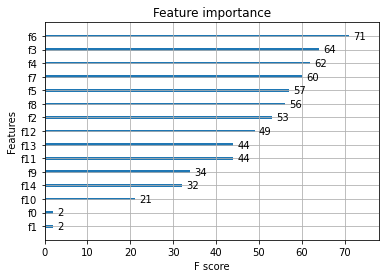

In [31]:
plot_importance(model_test)
# plot_importance(model)

In [32]:
y_pred = model_test.predict(x_test)
y_true = y_test

mae = mean_absolute_error(y_true, y_pred) 

print('mae: ', mae) 

mae:  4.993616246465427


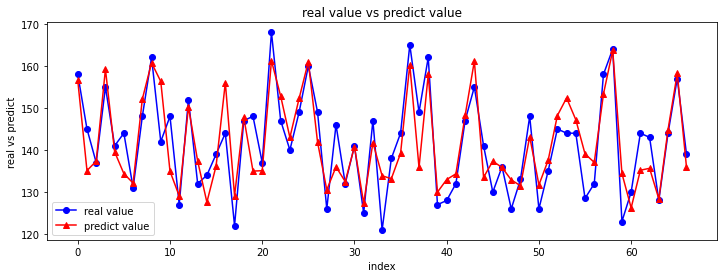

In [33]:
fig = plt.figure( figsize = (12, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(y_true, marker='o', color='blue', label='real value')
chart.plot(y_pred, marker='^', color='red', label='predict value')
chart.set_title('real value vs predict value')
plt.xlabel('index')
plt.ylabel('real vs predict')
plt.legend(loc = 'best')